<div class="alert alert-block alert-info">
<span style="font-size: 40px;"><b> Magnetic Equilibria </b></span><br><br>
<span style="font-size: 16px;">
In this script, we generate a figure to describe the magnetic equilibria in double-null (DN) + PT/NT configurations.<br>
(1) The position of the coils<br> 
(2) the profiles of density and temperature sources <br>
(3) the separatrix highlighted
</span>
</div>

In [7]:
import sys
sys.path.append("/home/kyungtak.lim/python_scripts")

import gbspy as g

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import scipy.interpolate
import scipy.special as sc
from scipy import ndimage
import pylab as pl
import sys
import gbspy as g

import h5py
import scipy.optimize
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import AutoMinorLocator
import matplotlib.lines as mlines
from matplotlib.ticker import AutoMinorLocator
from matplotlib.pyplot import figure

In [9]:
# IEEE journals typically require figures to be very clear at a column width of around 3.5 to 4 inches
fig_width = 3.5  # in inches

plt.rcParams.update({
    # Figure size and DPI
    'figure.figsize': (fig_width, fig_width / 1.618),  # IEEE column width, golden ratio height
    'figure.dpi': 300,                     # Figure resolution
    'savefig.dpi': 300,                    # Save figure resolution
    'savefig.format': 'pdf',               # Preferred format for vector graphics

    # Font settings
    'font.size': 10,                       # Main font size
    'font.family': 'sans-serif',           # Font family
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],  # Font type

    # Axes settings
    'axes.labelsize': 10,                  # Font size of the x and y labels
    'axes.titlesize': 10,                  # Font size of the title
    'axes.linewidth': 1,                   # Edge line width

    # Tick settings
    'xtick.labelsize': 8,                  # Font size of the x tick labels
    'ytick.labelsize': 8,                  # Font size of the y tick labels
    'xtick.major.size': 4,                 # Length of major tick marks
    'xtick.minor.size': 2,                 # Length of minor tick marks
    'xtick.major.width': 1,                # Width of major tick marks
    'xtick.minor.width': 0.5,              # Width of minor tick marks
    'ytick.major.size': 4,                 # Length of major tick marks
    'ytick.minor.size': 2,                 # Length of minor tick marks
    'ytick.major.width': 1,                # Width of major tick marks
    'ytick.minor.width': 0.5,              # Width of minor tick marks

    # Legend settings
    'legend.fontsize': 8,                  # Font size of the legend
    'legend.frameon': True,               # Disable background frame
    'legend.edgecolor':'white',

    # Line settings
    'lines.linewidth': 1.5,                # Line width
    'lines.markersize': 5,                 # Marker size

    # Grid settings
    'grid.alpha': 0.5,                     # Grid line transparency
    'grid.linestyle': ':',                 # Grid line style

})


<div class="alert alert-block alert-info" style="text-align: center;">
<span style="font-size: 40px;"><b> Grid parameters </b></span><br>
</div>

In [10]:
# Input Parameter
Lx = 600
Ly = 800
Nx = 244
Ny = 324

dx = Lx / (Nx-4)
dy = Ly / (Ny-4)

#xv = np.linspace(-3/2*dx, )
xv = np.arange(-3/2*dx, (Lx+3*dx/2)+1, dx)
yv = np.arange(-3/2*dy, (Ly+3*dy/2)+1, dy)
yn = np.arange(-1/2*dy, (Ly+5*dy/2)+1, dy)

# 2D meshgrid
Xv, Yv = np.meshgrid(xv,yv)
Xn, Yn = np.meshgrid(xv,yn)

X,Y = np.meshgrid(xv,yv)


<div class="alert alert-block alert-info" style="text-align: center;">
<span style="font-size: 40px;"><b> Figure 1: for the coils position </b></span><br>
</div>

In [4]:
os.chdir('/marconi_scratch/userexternal/klim0000/GBS/DN_tria/delta_scan/DNT_dn0p6')
s=g.Sim()

Psi_NT = s.Psi
ixxpt_NT = s.ixxpt
iyxpt_NT = s.iyxpt
x0_NT = s.x0
y0_NT = s.y0

I_xcoord_NT = [216.0,
 993.0734054565428,
 829.0532029210095,
 433.073405456543,
 37.09360799207633,
 -126.9265945434571,
 37.093607992076215,
 433.0734054565428,
 829.0532029210094]

I_ycoord_NT = [400.0,
 400.0,
 795.9797974644666,
 960.0,
 795.9797974644666,
 400.00000000000006,
 4.0202025355334285,
 -160.0,
 4.020202535533315]

x0n_NT = s.attribute['x0_EC_theta']
x0t_NT = s.attribute['x0_EC_tempe'] -40
ix0n_NT = s.find_ind(s.x0 + x0n_NT, s.x)
ix0t_NT = s.find_ind(s.x0 + x0t_NT, s.x)

# Width of the source
wn_NT = s.attribute['wEC_theta']
wt_NT = s.attribute['wEC_tempe']


# Amplitude of the source
An_NT = s.attribute['SEC_theta']
At_NT = s.attribute['SEC_tempe']


psi0n_NT = Psi_NT[s.iy0, ix0n_NT]
psi0t_NT = Psi_NT[s.iy0, ix0t_NT]


# Density source (Local flux)
Sn_NT = [[0 for x in range(s.nx)] for y in range(s.ny)]
St_NT = [[0 for x in range(s.nx)] for y in range(s.ny)]

for j in range(s.nx):
    for i in range(s.ny):
        if (i > s.iyxpt) and (i< (s.ny-s.iyxpt)):
            Sn_NT[i][j]=np.exp(-(Psi_NT[i][j] - psi0n_NT)**2/wn_NT**2) 
            St_NT[i][j] = At_NT/2 * (np.tanh(-(Psi_NT[i][j] - psi0t_NT)/wt_NT) + 1)

# List to array
Sn_NT = np.array(Sn_NT); 
St_NT = np.array(St_NT)

In [5]:
os.chdir('/marconi_scratch/userexternal/klim0000/GBS/DN_tria/delta_scan/DPT_d0p6')
s=g.Sim()

Psi_PT = s.Psi
ixxpt_PT = s.ixxpt
iyxpt_PT = s.iyxpt
x0_PT = s.x0
y0_PT = s.y0

I_xcoord_PT = [396.0,
 743.9349216461183,
 579.9147191105849,
 183.93492164611826,
 -212.04487581834837,
 -376.0650783538818,
 -212.0448758183485,
 183.93492164611808,
 579.9147191105847]

I_ycoord_PT = [400.0,
 400.0,
 795.9797974644666,
 960.0,
 795.9797974644666,
 400.00000000000006,
 4.0202025355334285,
 -160.0,
 4.020202535533315]

x0n_PT = s.attribute['x0_EC_theta'] +10
x0t_PT = s.attribute['x0_EC_tempe'] +15
ix0n_PT = s.find_ind(s.x0 + x0n_PT, s.x)
ix0t_PT = s.find_ind(s.x0 + x0t_PT, s.x)

# Width of the source
wn_PT = s.attribute['wEC_theta']
wt_PT = s.attribute['wEC_tempe']


# Amplitude of the source
An_PT = s.attribute['SEC_theta']
At_PT = s.attribute['SEC_tempe']


psi0n_PT = Psi_PT[s.iy0, ix0n_PT]
psi0t_PT = Psi_PT[s.iy0, ix0t_PT]


# Density source (Local flux)
Sn_PT = [[0 for x in range(s.nx)] for y in range(s.ny)]
St_PT = [[0 for x in range(s.nx)] for y in range(s.ny)]

for j in range(s.nx):
    for i in range(s.ny):
        if (i > s.iyxpt) and (i< (s.ny-s.iyxpt)):
            Sn_PT[i][j] = An_PT*np.exp(-(Psi_PT[i][j] - psi0n_PT)**2/wn_PT**2) 
            St_PT[i][j] = At_PT/2 * (np.tanh(-(Psi_PT[i][j] - psi0t_PT)/wt_PT) + 1)

# List to array
Sn_PT = np.array(Sn_PT); 
St_PT = np.array(St_PT)

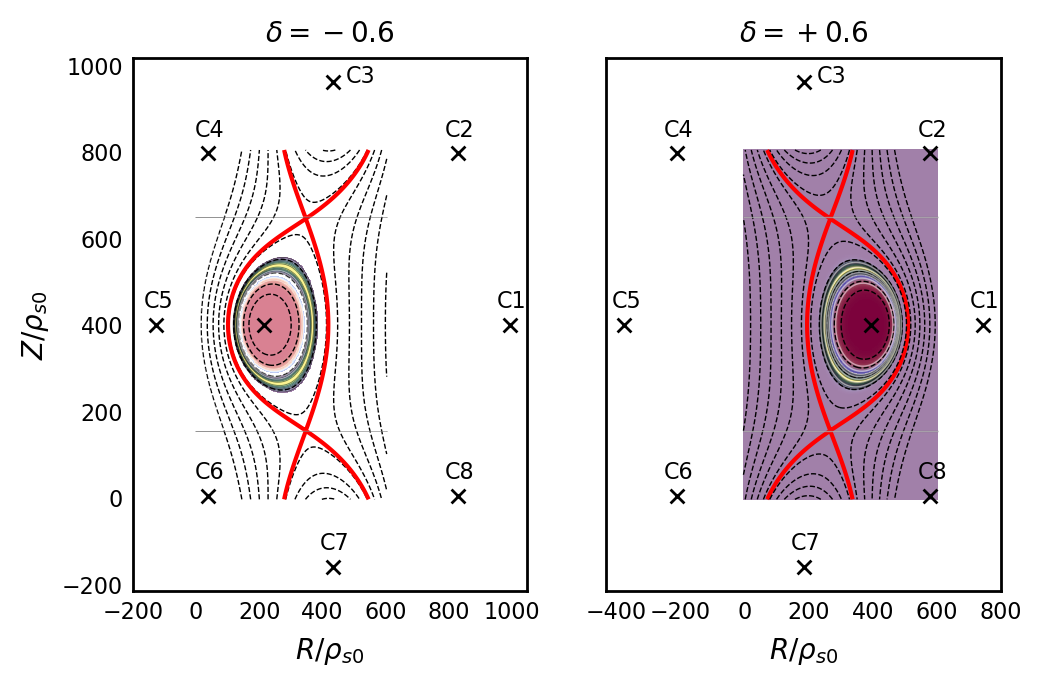

In [6]:
fig_width = 3.5  # in inches
fig_height = fig_width / 1.618  # Golden ratio height for a single subplot

fig, axes = plt.subplots(ncols=2, figsize=(1.6*fig_width, 1.6*fig_height), sharey=True, dpi=200)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)



# DNT -0.6
levels_NT = np.arange(int(Psi_NT[int(len(Psi_NT)/2)][int(len(Psi_NT[0])/2)]), 
                   int(Psi_NT[int(len(Psi_NT)/2)][int(len(Psi_NT[0]))-1]),
                  int(Psi_NT[int(len(Psi_NT)/2)][int(len(Psi_NT[0])/2)])/170)
axes[0].contour(X, Y, Psi_NT, levels=levels_NT, linestyles='dashed', colors='k', linewidths=0.5)
axes[0].contour(X, Y, Psi_NT, levels=[Psi_NT[iyxpt_NT, ixxpt_NT]], colors='r')

# Mask values close to zero
threshold_dens = 0.1  # Define your threshold for 'close to zero'
Sn_NT_masked = np.ma.masked_where(np.abs(Sn_NT) < threshold_dens, Sn_NT)
threshold_tempe = 0.1  # Define your threshold for 'close to zero'
St_NT_masked = np.ma.masked_where(np.abs(St_NT) < threshold_tempe, St_NT)

# Create a colormap
cmap_dens = plt.cm.viridis.copy()  # Choose a colormap
cmap_dens.set_bad(color='white')  # Set color for masked values
cmap_tempe = plt.cm.coolwarm.copy()   # Choose a colormap
cmap_tempe.set_bad(color='white')  # Set color for masked values

axes[0].pcolormesh(X, Y, Sn_NT_masked, cmap=cmap_dens)
axes[0].pcolormesh(X, Y, St_NT_masked, cmap=cmap_tempe, alpha=0.5)
# Overlay contour lines for clarity
axes[0].contour(X, Y, Sn_NT, colors='k', linewidths=0.3, alpha=0.5)
axes[0].contour(X, Y, St_NT, colors='w', linewidths=0.3, alpha=0.5)

#axes[0].pcolormesh(X, Y, St_NT)
for i in range(len(I_xcoord_NT)):
    axes[0].scatter(I_xcoord_NT[i], I_ycoord_NT[i], marker='x', c='k', fc='k', lw=1)
   
# DPT 0.6
levels_PT = np.arange(int(Psi_PT[int(len(Psi_PT)/2)][int(len(Psi_PT[0])/2)]), 
                   int(Psi_PT[int(len(Psi_PT)/2)][int(len(Psi_PT[0]))-1]),
                  int(Psi_PT[int(len(Psi_PT)/2)][int(len(Psi_PT[0])/2)])/200)
axes[1].contour(X, Y, Psi_PT, levels=[Psi_PT[iyxpt_PT, ixxpt_PT]], linestyles='solid', colors='r')
axes[1].contour(X, Y, Psi_PT, levels=levels_PT, linestyles='dashed', colors='k', linewidths=0.5)
axes[1].pcolormesh(X, Y, Sn_PT)


# Mask values close to zero
threshold_dens = 0.1  # Define your threshold for 'close to zero'
Sn_PT_masked = np.ma.masked_where(np.abs(Sn_PT) < threshold_dens, Sn_PT)
threshold_tempe = 0.1  # Define your threshold for 'close to zero'
St_PT_masked = np.ma.masked_where(np.abs(St_PT) < threshold_tempe, St_PT)

# Create a colormap
cmap_dens = plt.cm.viridis.copy()  # Choose a colormap
#cmap_dens.set_bad(color='white')  # Set color for masked values
cmap_tempe = plt.cm.coolwarm.copy()   # Choose a colormap
cmap_tempe.set_bad(color='white')  # Set color for masked values

axes[1].pcolormesh(X, Y, Sn_PT_masked, cmap=cmap_dens)
axes[1].pcolormesh(X, Y, St_PT_masked, cmap=cmap_tempe, alpha=0.5)
# Overlay contour lines for clarity
axes[1].contour(X, Y, Sn_PT, colors='k', linewidths=0.5, alpha=0.5)
axes[1].contour(X, Y, St_PT, colors='w', linewidths=0.5, alpha=0.5)
for i in range(len(I_xcoord_NT)):
    axes[1].scatter(I_xcoord_PT[i], I_ycoord_PT[i], marker='x', c='k', fc='k', lw=1)



for ax in axes:
    #ax.grid(True, which='major')
    #ax.grid(True, which='major', alpha=0.8, linestyle=':', linewidth=0.5)
    #ax.xaxis.set_minor_locator(AutoMinorLocator())
    #ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis='both', which='both', length=0)
    #ax.tick_params(which='minor', direction="in")
    #ax.xaxis.set_ticks([])
    #ax.yaxis.set_ticks([])
    ax.set_xlabel(r'$R/\rho_{s0}$')
    #ax.yaxis.get_offset_text().set_fontsize(10)
    # Figure edge setting
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["left"].set_linewidth(1)
    ax.spines["right"].set_linewidth(1)
    ax.spines["top"].set_linewidth(1)
    #ax.axis('off')

axes[0].set_xticks(np.arange(-200, 1001, 200))
axes[1].set_xticks(np.arange(-400, 801, 200))

    
axes[0].set_ylabel(r'$Z/\rho_{s0}$',rotation=90)   
#axes[1].spines[['right', 'top', 'left', 'bottom']].set_visible(False)
#axes[1].spines[['right', 'top']].set_visible(False)
#axes[0].spines[['right', 'top']].set_visible(False)
#axes[0].spines[['left', 'bottom']].set_visible(True)

axes[0].set_title(r'$\delta=-0.6$')
axes[1].set_title(r'$\delta=+0.6$')

NT_x_move = -40; NT_y_move = 40

axes[0].text(I_xcoord_NT[1]+NT_x_move, I_ycoord_NT[1]+NT_y_move, 'C1', fontsize=8)
axes[0].text(I_xcoord_NT[2]+NT_x_move, I_ycoord_NT[2]+NT_y_move, 'C2', fontsize=8)
axes[0].text(I_xcoord_NT[3]+NT_x_move+80, I_ycoord_NT[3]+NT_y_move-40, 'C3', fontsize=8)
axes[0].text(I_xcoord_NT[4]+NT_x_move, I_ycoord_NT[4]+NT_y_move, 'C4', fontsize=8)
axes[0].text(I_xcoord_NT[5]+NT_x_move, I_ycoord_NT[5]+NT_y_move, 'C5', fontsize=8)
axes[0].text(I_xcoord_NT[6]+NT_x_move, I_ycoord_NT[6]+NT_y_move, 'C6', fontsize=8)
axes[0].text(I_xcoord_NT[7]+NT_x_move, I_ycoord_NT[7]+NT_y_move, 'C7', fontsize=8)
axes[0].text(I_xcoord_NT[8]+NT_x_move, I_ycoord_NT[8]+NT_y_move, 'C8', fontsize=8)


PT_x_move = -40; PT_y_move = 40
axes[1].text(I_xcoord_PT[1]+PT_x_move, I_ycoord_PT[1]+PT_y_move, 'C1', fontsize=8)
axes[1].text(I_xcoord_PT[2]+PT_x_move, I_ycoord_PT[2]+PT_y_move, 'C2', fontsize=8)
axes[1].text(I_xcoord_PT[3]+PT_x_move+80, I_ycoord_PT[3]+PT_y_move-40, 'C3', fontsize=8)
axes[1].text(I_xcoord_PT[4]+PT_x_move, I_ycoord_PT[4]+PT_y_move, 'C4', fontsize=8)
axes[1].text(I_xcoord_PT[5]+PT_x_move, I_ycoord_PT[5]+PT_y_move, 'C5', fontsize=8)
axes[1].text(I_xcoord_PT[6]+PT_x_move, I_ycoord_PT[6]+PT_y_move, 'C6', fontsize=8)
axes[1].text(I_xcoord_PT[7]+PT_x_move, I_ycoord_PT[7]+PT_y_move, 'C7', fontsize=8)
axes[1].text(I_xcoord_PT[8]+PT_x_move, I_ycoord_PT[8]+PT_y_move, 'C8', fontsize=8)

# Save the figure
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("Equil_DN.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=300)

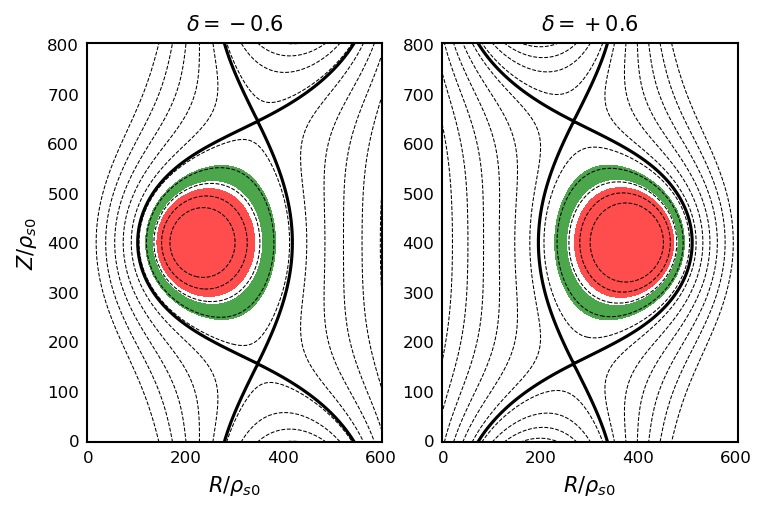

In [7]:
fig, axes = plt.subplots(ncols=2, figsize=(1.6*fig_width, 1.6*fig_height), dpi=150)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)

# DNT -0.6
levels_NT = np.arange(int(Psi_NT[int(len(Psi_NT)/2)][int(len(Psi_NT[0])/2)]), 
                   int(Psi_NT[int(len(Psi_NT)/2)][int(len(Psi_NT[0]))-1]),
                  int(Psi_NT[int(len(Psi_NT)/2)][int(len(Psi_NT[0])/2)])/170)

Psi_NT_masked = np.where((Y >= 200) & (Y <= 600), Psi_NT, np.nan)


levels_NT_sn = [227800, 229000] 
levels_NT_st = [221000, 227000]

axes[0].contour(X, Y, Psi_NT, levels=levels_NT, linestyles='dashed', colors='k', linewidths=0.5)
axes[0].contour(X, Y, Psi_NT, levels=[Psi_NT[iyxpt_NT, ixxpt_NT]], colors='k')

axes[0].contourf(X, Y, Psi_NT_masked, levels=levels_NT_sn, colors='g', alpha=0.7)
axes[0].contourf(X, Y, Psi_NT_masked, levels=levels_NT_st, colors='r', alpha=0.7)


######################### PT #######################

Psi_PT_masked = np.where((Y >= 200) & (Y <= 600), Psi_PT, np.nan)


levels_PT_sn = [227500, 228600] 
levels_PT_st = [221000, 226700]
    
    
# DPT 0.6
levels_PT = np.arange(int(Psi_PT[int(len(Psi_PT)/2)][int(len(Psi_PT[0])/2)]), 
                   int(Psi_PT[int(len(Psi_PT)/2)][int(len(Psi_PT[0]))-1]),
                  int(Psi_PT[int(len(Psi_PT)/2)][int(len(Psi_PT[0])/2)])/200)
axes[1].contour(X, Y, Psi_PT, levels=[Psi_PT[iyxpt_PT, ixxpt_PT]], linestyles='solid', colors='k')
axes[1].contour(X, Y, Psi_PT, levels=levels_PT, linestyles='dashed', colors='k', linewidths=0.5)

axes[1].contourf(X, Y, Psi_PT_masked, levels=levels_PT_sn, colors='g', alpha=0.7)
axes[1].contourf(X, Y, Psi_PT_masked, levels=levels_PT_st, colors='r', alpha=0.7)


for ax in axes:

    ax.tick_params(axis='both', which='both', length=0)
    ax.set_xlabel(r'$R/\rho_{s0}$')
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["left"].set_linewidth(1)
    ax.spines["right"].set_linewidth(1)
    ax.spines["top"].set_linewidth(1)


    
axes[0].set_ylabel(r'$Z/\rho_{s0}$',rotation=90)   

axes[0].set_title(r'$\delta=-0.6$')
axes[1].set_title(r'$\delta=+0.6$')

# Save the figure
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("Equil_DN.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=300)

<div class="alert alert-block alert-info" style="text-align: center;">
<span style="font-size: 40px;"><b> Figure 2: delta scan </b></span><br>
</div>

In [11]:
os.chdir('/marconi_scratch/userexternal/klim0000/GBS/DN_tria/delta_scan/DNT_dn0p3')
s=g.Sim()

Psi_NT_d0p3 = s.Psi
ixxpt_NT_d0p3 = s.ixxpt
iyxpt_NT_d0p3 = s.iyxpt
x0_NT_d0p3 = s.x0
y0_NT_d0p3 = s.y0

os.chdir('/marconi_scratch/userexternal/klim0000/GBS/DN_tria/delta_scan/DNT_dn0p5')
s=g.Sim()

Psi_NT_d0p4 = s.Psi
ixxpt_NT_d0p4 = s.ixxpt
iyxpt_NT_d0p4 = s.iyxpt
x0_NT_d0p4 = s.x0
y0_NT_d0p4 = s.y0

os.chdir('/marconi_scratch/userexternal/klim0000/GBS/DN_tria/delta_scan/DNT_dn0p6')
s=g.Sim()

Psi_NT_d0p6 = s.Psi
ixxpt_NT_d0p6 = s.ixxpt
iyxpt_NT_d0p6 = s.iyxpt
x0_NT_d0p6 = s.x0
y0_NT_d0p6 = s.y0

An error occured when opening /marconi_scratch/userexternal/klim0000/GBS/DN_tria/delta_scan/DNT_dn0p3/results_62.h5:
Unable to open file (file signature not found)
Trying to skip the file...
Last results file skipped


In [13]:
os.chdir('/marconi_scratch/userexternal/klim0000/GBS/DN_tria/delta_scan/DPT_d0p3')
s=g.Sim()

Psi_PT_d0p3 = s.Psi
ixxpt_PT_d0p3 = s.ixxpt
iyxpt_PT_d0p3 = s.iyxpt
x0_PT_d0p3 = s.x0
y0_PT_d0p3 = s.y0

os.chdir('/marconi_scratch/userexternal/klim0000/GBS/DN_tria/delta_scan/DPT_d0p4')
s=g.Sim()

Psi_PT_d0p4 = s.Psi
ixxpt_PT_d0p4 = s.ixxpt
iyxpt_PT_d0p4 = s.iyxpt
x0_PT_d0p4 = s.x0
y0_PT_d0p4 = s.y0

os.chdir('/marconi_scratch/userexternal/klim0000/GBS/DN_tria/delta_scan/DPT_d0p6')
s=g.Sim()

Psi_PT_d0p6 = s.Psi
ixxpt_PT_d0p6 = s.ixxpt
iyxpt_PT_d0p6 = s.iyxpt
x0_PT_d0p6 = s.x0
y0_PT_d0p6 = s.y0


An error occured when opening /marconi_scratch/userexternal/klim0000/GBS/DN_tria/delta_scan/DPT_d0p4/results_51.h5:
Unable to open file (file signature not found)
Trying to skip the file...
Last results file skipped


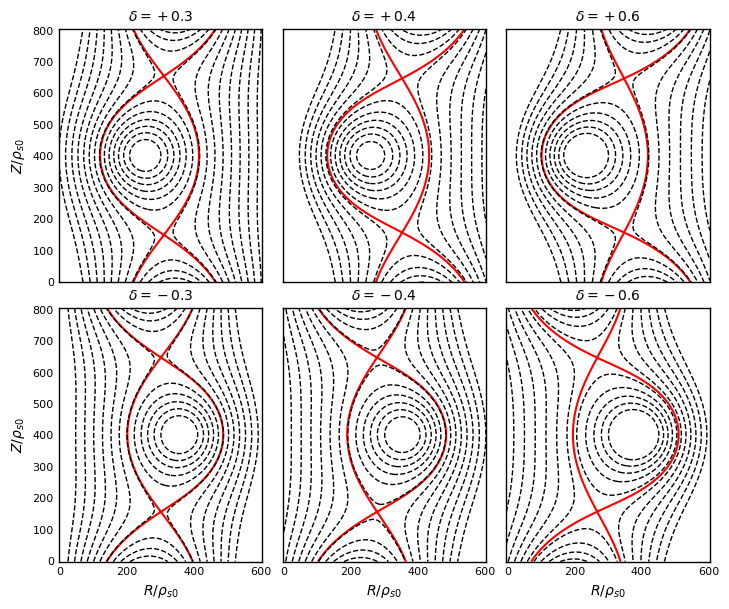

In [14]:
fig_width = 3.5  # in inches
fig_height = fig_width / 1.618  # Golden ratio height for a single subplot

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(2.4*fig_width, 2*1.6*fig_height), sharex=True, 
                         sharey=True, dpi=100)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)


levels_NT_d0p3 = np.arange(int(Psi_NT_d0p3[int(len(Psi_NT_d0p3)/2)][int(len(Psi_NT_d0p3[0])/2)]), 
                   int(Psi_NT_d0p3[int(len(Psi_NT_d0p3)/2)][int(len(Psi_NT_d0p3[0]))-1]),
                  int(Psi_NT_d0p3[int(len(Psi_NT_d0p3)/2)][int(len(Psi_NT_d0p3[0])/2)])/200)

levels_NT_d0p4 = np.arange(int(Psi_NT_d0p4[int(len(Psi_NT_d0p4)/2)][int(len(Psi_NT_d0p4[0])/2)]), 
                   int(Psi_NT_d0p4[int(len(Psi_NT_d0p4)/2)][int(len(Psi_NT_d0p4[0]))-1]),
                  int(Psi_NT_d0p4[int(len(Psi_NT_d0p4)/2)][int(len(Psi_NT_d0p4[0])/2)])/200)

levels_NT_d0p6 = np.arange(int(Psi_NT_d0p6[int(len(Psi_NT_d0p6)/2)][int(len(Psi_NT_d0p6[0])/2)]), 
                   int(Psi_NT_d0p6[int(len(Psi_NT_d0p6)/2)][int(len(Psi_NT_d0p6[0]))-1]),
                  int(Psi_NT_d0p6[int(len(Psi_NT_d0p6)/2)][int(len(Psi_NT_d0p6[0])/2)])/200)

levels_PT_d0p3 = np.arange(int(Psi_PT_d0p3[int(len(Psi_PT_d0p3)/2)][int(len(Psi_PT_d0p3[0])/2)]), 
                   int(Psi_PT_d0p3[int(len(Psi_PT_d0p3)/2)][int(len(Psi_PT_d0p3[0]))-1]),
                  int(Psi_PT_d0p3[int(len(Psi_PT_d0p3)/2)][int(len(Psi_PT_d0p3[0])/2)])/200)

levels_PT_d0p4 = np.arange(int(Psi_PT_d0p4[int(len(Psi_PT_d0p4)/2)][int(len(Psi_PT_d0p4[0])/2)]), 
                   int(Psi_PT_d0p4[int(len(Psi_PT_d0p4)/2)][int(len(Psi_PT_d0p4[0]))-1]),
                  int(Psi_PT_d0p4[int(len(Psi_PT_d0p4)/2)][int(len(Psi_PT_d0p4[0])/2)])/200)

levels_PT_d0p6 = np.arange(int(Psi_PT_d0p6[int(len(Psi_PT_d0p6)/2)][int(len(Psi_PT_d0p6[0])/2)]), 
                   int(Psi_PT_d0p6[int(len(Psi_PT_d0p6)/2)][int(len(Psi_PT_d0p6[0]))-1]),
                  int(Psi_PT_d0p6[int(len(Psi_PT_d0p6)/2)][int(len(Psi_PT_d0p6[0])/2)])/200)

axes[0,0].contour(X, Y, Psi_NT_d0p3, levels=[Psi_NT_d0p3[iyxpt_NT_d0p3, ixxpt_NT_d0p3]], colors='r')
axes[0,0].contour(X, Y, Psi_NT_d0p3, levels=levels_NT_d0p3, linestyles='dashed', colors='k', linewidths=1)

axes[0,1].contour(X, Y, Psi_NT_d0p4, levels=[Psi_NT_d0p4[iyxpt_NT_d0p4, ixxpt_NT_d0p4]], colors='r')
axes[0,1].contour(X, Y, Psi_NT_d0p4, levels=levels_NT_d0p4, linestyles='dashed', colors='k', linewidths=1)

axes[0,2].contour(X, Y, Psi_NT_d0p6, levels=[Psi_NT_d0p6[iyxpt_NT_d0p6, ixxpt_NT_d0p6]], colors='r')
axes[0,2].contour(X, Y, Psi_NT_d0p6, levels=levels_NT_d0p6, linestyles='dashed', colors='k', linewidths=1)


axes[1,0].contour(X, Y, Psi_PT_d0p3, levels=[Psi_PT_d0p3[iyxpt_PT_d0p3, ixxpt_PT_d0p3]], colors='r')
axes[1,0].contour(X, Y, Psi_PT_d0p3, levels=levels_PT_d0p3, linestyles='dashed', colors='k', linewidths=1)

axes[1,1].contour(X, Y, Psi_PT_d0p4, levels=[Psi_PT_d0p4[iyxpt_PT_d0p4, ixxpt_PT_d0p4]], colors='r')
axes[1,1].contour(X, Y, Psi_PT_d0p4, levels=levels_PT_d0p4, linestyles='dashed', colors='k', linewidths=1)

axes[1,2].contour(X, Y, Psi_PT_d0p6, levels=[Psi_PT_d0p6[iyxpt_PT_d0p6, ixxpt_PT_d0p6]], colors='r')
axes[1,2].contour(X, Y, Psi_PT_d0p6, levels=levels_PT_d0p6, linestyles='dashed', colors='k', linewidths=1)


for row in axes:
    for ax in row:
        #ax.grid(True, which='major')
        #ax.grid(True, which='major', alpha=0.8, linestyle=':', linewidth=0.5)
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        ax.tick_params(which='major', direction="in", length=0)
        ax.tick_params(which='minor', direction="in", length=0)
        #ax.xaxis.set_ticks([])
        #ax.yaxis.set_ticks([])
        #ax.yaxis.get_offset_text().set_fontsize(10)
        # Figure edge setting
        ax.spines["bottom"].set_linewidth(1)
        ax.spines["left"].set_linewidth(1)
        ax.spines["right"].set_linewidth(1)
        ax.spines["top"].set_linewidth(1)
        #ax.axis('off')


        
axes[0,0].set_ylabel(r'$Z/\rho_{s0}$')
axes[1,0].set_ylabel(r'$Z/\rho_{s0}$')

axes[1,0].set_xlabel(r'$R/\rho_{s0}$')
axes[1,1].set_xlabel(r'$R/\rho_{s0}$')
axes[1,2].set_xlabel(r'$R/\rho_{s0}$')


axes[1,0].set_title(r'$\delta=-0.3$')
axes[1,1].set_title(r'$\delta=-0.4$')
axes[1,2].set_title(r'$\delta=-0.6$')

axes[0,0].set_title(r'$\delta=+0.3$')
axes[0,1].set_title(r'$\delta=+0.4$')
axes[0,2].set_title(r'$\delta=+0.6$')

    
#axes[0].set_ylabel(r'$Z/\rho_{s0}$',rotation=90)   
#axes[1].spines[['right', 'top', 'left', 'bottom']].set_visible(False)
#axes[1].spines[['right', 'top']].set_visible(False)
#axes[0].spines[['right', 'top']].set_visible(False)
#axes[0].spines[['left', 'bottom']].set_visible(True)

#axes[0].set_title(r'$\delta=-0.6$', pad=10)
#axes[1].set_title(r'$\delta=+0.6$', pad=10)

# Save the figure
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("Equil_DN.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=300)

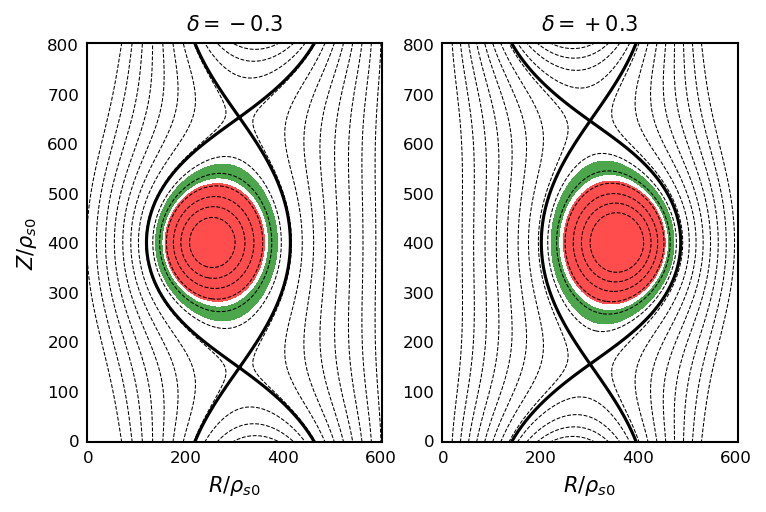

In [54]:
fig, axes = plt.subplots(ncols=2, figsize=(1.6*fig_width, 1.6*fig_height), dpi=150)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)

# DNT -0.6
levels_NT_d0p3 = np.arange(int(Psi_NT_d0p3[int(len(Psi_NT_d0p3)/2)][int(len(Psi_NT_d0p3[0])/2)]), 
                   int(Psi_NT_d0p3[int(len(Psi_NT_d0p3)/2)][int(len(Psi_NT_d0p3[0]))-1]),
                  int(Psi_NT_d0p3[int(len(Psi_NT_d0p3)/2)][int(len(Psi_NT_d0p3[0])/2)])/200)

Psi_NT_d0p3_masked = np.where((Y >= 200) & (Y <= 600), Psi_NT_d0p3, np.nan)


levels_NT_d0p3_sn = [217500, 218500] 
levels_NT_d0p3_st = [212331, 217000]

axes[0].contour(X, Y, Psi_NT_d0p3, levels=levels_NT_d0p3, linestyles='dashed', colors='k', linewidths=0.5)
axes[0].contour(X, Y, Psi_NT_d0p3, levels=[Psi_NT_d0p3[iyxpt_NT_d0p3, ixxpt_NT_d0p3]], colors='k')

axes[0].contourf(X, Y, Psi_NT_d0p3_masked, levels=levels_NT_d0p3_sn, colors='g', alpha=0.7)
axes[0].contourf(X, Y, Psi_NT_d0p3_masked, levels=levels_NT_d0p3_st, colors='r', alpha=0.7)


######################### PT #######################

Psi_PT_d0p3_masked = np.where((Y >= 200) & (Y <= 600), Psi_PT_d0p3, np.nan)


levels_PT_d0p3_sn = [213200, 214000] 
levels_PT_d0p3_st = [205000, 212700]
    
    
# DPT 0.6
levels_PT_d0p3 = np.arange(int(Psi_PT_d0p3[int(len(Psi_PT_d0p3)/2)][int(len(Psi_PT_d0p3[0])/2)]), 
                   int(Psi_PT_d0p3[int(len(Psi_PT_d0p3)/2)][int(len(Psi_PT_d0p3[0]))-1]),
                  int(Psi_PT_d0p3[int(len(Psi_PT_d0p3)/2)][int(len(Psi_PT_d0p3[0])/2)])/230)
axes[1].contour(X, Y, Psi_PT_d0p3, levels=[Psi_PT_d0p3[iyxpt_PT_d0p3, ixxpt_PT_d0p3]], linestyles='solid', colors='k')
axes[1].contour(X, Y, Psi_PT_d0p3, levels=levels_PT_d0p3, linestyles='dashed', colors='k', linewidths=0.5)

axes[1].contourf(X, Y, Psi_PT_d0p3_masked, levels=levels_PT_d0p3_sn, colors='g', alpha=0.7)
axes[1].contourf(X, Y, Psi_PT_d0p3_masked, levels=levels_PT_d0p3_st, colors='r', alpha=0.7)


for ax in axes:

    ax.tick_params(axis='both', which='both', length=0)
    ax.set_xlabel(r'$R/\rho_{s0}$')
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["left"].set_linewidth(1)
    ax.spines["right"].set_linewidth(1)
    ax.spines["top"].set_linewidth(1)


    
axes[0].set_ylabel(r'$Z/\rho_{s0}$',rotation=90)   

axes[0].set_title(r'$\delta=-0.3$')
axes[1].set_title(r'$\delta=+0.3$')

# Save the figure
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("Equil_DN.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=300)

<div class="alert alert-block alert-info" style="text-align: center;">
<span style="font-size: 40px;"><b> Final figure </b></span><br>
</div>

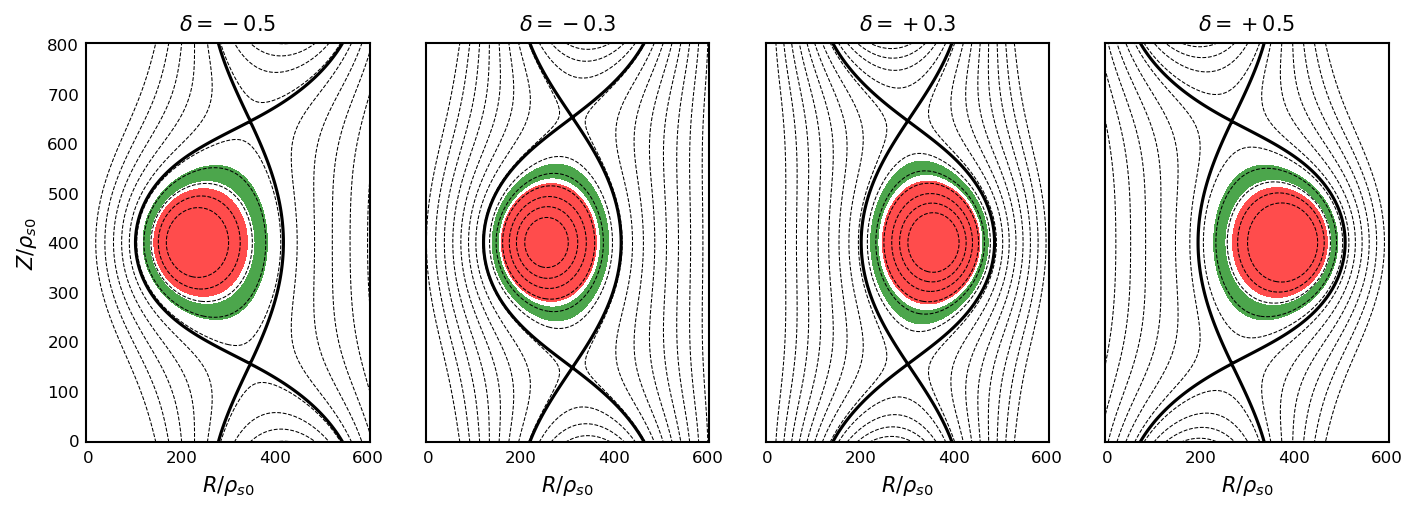

In [59]:
fig, axes = plt.subplots(ncols=4, figsize=(3.2*fig_width, 1.6*fig_height), sharey=True, dpi=150)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)

#####################################################################################################
# DNT -0.6
levels_NT = np.arange(int(Psi_NT[int(len(Psi_NT)/2)][int(len(Psi_NT[0])/2)]), 
                   int(Psi_NT[int(len(Psi_NT)/2)][int(len(Psi_NT[0]))-1]),
                  int(Psi_NT[int(len(Psi_NT)/2)][int(len(Psi_NT[0])/2)])/170)

Psi_NT_masked = np.where((Y >= 200) & (Y <= 600), Psi_NT, np.nan)


levels_NT_sn = [227800, 229000] 
levels_NT_st = [221000, 227000]

axes[0].contour(X, Y, Psi_NT, levels=levels_NT, linestyles='dashed', colors='k', linewidths=0.5)
axes[0].contour(X, Y, Psi_NT, levels=[Psi_NT[iyxpt_NT, ixxpt_NT]], colors='k')

axes[0].contourf(X, Y, Psi_NT_masked, levels=levels_NT_sn, colors='g', alpha=0.7)
axes[0].contourf(X, Y, Psi_NT_masked, levels=levels_NT_st, colors='r', alpha=0.7)

#####################################################################################################
# DNT -0.3
levels_NT_d0p3 = np.arange(int(Psi_NT_d0p3[int(len(Psi_NT_d0p3)/2)][int(len(Psi_NT_d0p3[0])/2)]), 
                   int(Psi_NT_d0p3[int(len(Psi_NT_d0p3)/2)][int(len(Psi_NT_d0p3[0]))-1]),
                  int(Psi_NT_d0p3[int(len(Psi_NT_d0p3)/2)][int(len(Psi_NT_d0p3[0])/2)])/200)

Psi_NT_d0p3_masked = np.where((Y >= 200) & (Y <= 600), Psi_NT_d0p3, np.nan)


levels_NT_d0p3_sn = [217500, 218500] 
levels_NT_d0p3_st = [212331, 217000]

axes[1].contour(X, Y, Psi_NT_d0p3, levels=levels_NT_d0p3, linestyles='dashed', colors='k', linewidths=0.5)
axes[1].contour(X, Y, Psi_NT_d0p3, levels=[Psi_NT_d0p3[iyxpt_NT_d0p3, ixxpt_NT_d0p3]], colors='k')

axes[1].contourf(X, Y, Psi_NT_d0p3_masked, levels=levels_NT_d0p3_sn, colors='g', alpha=0.7)
axes[1].contourf(X, Y, Psi_NT_d0p3_masked, levels=levels_NT_d0p3_st, colors='r', alpha=0.7)

#####################################################################################################

Psi_PT_d0p3_masked = np.where((Y >= 200) & (Y <= 600), Psi_PT_d0p3, np.nan)


levels_PT_d0p3_sn = [213200, 214000] 
levels_PT_d0p3_st = [205000, 212700]
    
    
# DPT 0.6
levels_PT_d0p3 = np.arange(int(Psi_PT_d0p3[int(len(Psi_PT_d0p3)/2)][int(len(Psi_PT_d0p3[0])/2)]), 
                   int(Psi_PT_d0p3[int(len(Psi_PT_d0p3)/2)][int(len(Psi_PT_d0p3[0]))-1]),
                  int(Psi_PT_d0p3[int(len(Psi_PT_d0p3)/2)][int(len(Psi_PT_d0p3[0])/2)])/230)
axes[2].contour(X, Y, Psi_PT_d0p3, levels=[Psi_PT_d0p3[iyxpt_PT_d0p3, ixxpt_PT_d0p3]], linestyles='solid', colors='k')
axes[2].contour(X, Y, Psi_PT_d0p3, levels=levels_PT_d0p3, linestyles='dashed', colors='k', linewidths=0.5)

axes[2].contourf(X, Y, Psi_PT_d0p3_masked, levels=levels_PT_d0p3_sn, colors='g', alpha=0.7)
axes[2].contourf(X, Y, Psi_PT_d0p3_masked, levels=levels_PT_d0p3_st, colors='r', alpha=0.7)



######################### PT #######################

Psi_PT_masked = np.where((Y >= 200) & (Y <= 600), Psi_PT, np.nan)


levels_PT_sn = [227500, 228600] 
levels_PT_st = [221000, 226700]
    
    
# DPT 0.6
levels_PT = np.arange(int(Psi_PT[int(len(Psi_PT)/2)][int(len(Psi_PT[0])/2)]), 
                   int(Psi_PT[int(len(Psi_PT)/2)][int(len(Psi_PT[0]))-1]),
                  int(Psi_PT[int(len(Psi_PT)/2)][int(len(Psi_PT[0])/2)])/200)
axes[3].contour(X, Y, Psi_PT, levels=[Psi_PT[iyxpt_PT, ixxpt_PT]], linestyles='solid', colors='k')
axes[3].contour(X, Y, Psi_PT, levels=levels_PT, linestyles='dashed', colors='k', linewidths=0.5)

axes[3].contourf(X, Y, Psi_PT_masked, levels=levels_PT_sn, colors='g', alpha=0.7)
axes[3].contourf(X, Y, Psi_PT_masked, levels=levels_PT_st, colors='r', alpha=0.7)
#####################################################################################################


for ax in axes:

    ax.tick_params(axis='both', which='both', length=0)
    ax.set_xlabel(r'$R/\rho_{s0}$')
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["left"].set_linewidth(1)
    ax.spines["right"].set_linewidth(1)
    ax.spines["top"].set_linewidth(1)


    
axes[0].set_ylabel(r'$Z/\rho_{s0}$',rotation=90)   

axes[0].set_title(r'$\delta=-0.5$')
axes[1].set_title(r'$\delta=-0.3$')
axes[2].set_title(r'$\delta=+0.3$')
axes[3].set_title(r'$\delta=+0.5$')

# Save the figure
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("Equil_DN_tria.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=300)